In [1]:
import json
import pandas as pd
from Bio import AlignIO
import matplotlib.pyplot as plt
import numpy as np

# ==== FILES ====
gene = "h3_trunk"

PATH = "/lustre/fs5/jarv_lab/scratch/adenisova/Inno_2025/tmp/hyphy_tutor"
json_file = f"{PATH}/{gene}.json"

aln_file  = f"{PATH}/{gene}.prot.fna"

alignment = AlignIO.read(aln_file, "fasta")
aln_len = alignment.get_alignment_length()

print(f"aln_len: {aln_len}")

aln_len: 566


In [ ]:
# ==== LOAD MEME JSON ====
with open(json_file) as f:
    meme = json.load(f)

# === Extract selected sites ===
sites = meme["MLE"]["content"]["0"]
headers = meme["MLE"]["headers"]
substitution_matrix = meme["MLE"]["content"]["1"]["0"]["0"]["substitutionMatrix"]


df = pd.DataFrame(sites, columns=[i[0] for i in headers])
df['site_n'] = df.index + 1
df["omega+"] = df["&beta;<sup>+</sup>"] / df["&alpha;"]

df_great = df[
    (df["p-value"] < 0.1) &
    (df["# branches under selection"] >= 1) &
    (df["omega+"] > 1) &
    (df["p<sup>+</sup>"] > 0.05)
]
df_great.head()

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
63,1.966556e-09,9.315385e-10,0.407791,45.014334,0.592209,3.407464,0.086205,5,0,-33.933793,-33.897643,0.964496,0.000000,64,2.288993e+10
153,6.376065e-09,3.238942e-09,0.399804,64.409829,0.600196,4.891367,0.039875,7,0,-56.460267,-56.339468,0.886212,0.000000,154,1.010181e+10
207,3.131396e-07,1.442444e-07,0.723654,435.936801,0.276346,5.556706,0.028308,6,0,-41.842729,-41.397057,0.640394,0.000000,208,1.392148e+09
208,1.503662e+01,0.000000e+00,0.874043,2909.838430,0.125957,8.358087,0.006767,1,0,-26.204648,-20.577190,0.003598,15.165264,209,1.935167e+02
241,1.446937e+01,0.000000e+00,0.809375,268.115729,0.190625,4.271010,0.054965,7,0,-62.729408,-61.442247,0.276053,19.219996,242,1.852988e+01


In [3]:
df

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
0,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0,0,0.000000,0.000000,1.000000,0.000000e+00,1,NaN
1,7.808771e+00,2.688417e-03,0.651780,11.884817,0.348220,-0.005744,0.666667,1,0,-17.088967,-17.092610,1.000000,7.619462e+00,2,1.521983e+00
2,0.000000e+00,0.000000e+00,0.440451,8.585349,0.559549,0.648963,0.391209,1,0,-11.722400,-11.719423,0.997028,0.000000e+00,3,inf
3,9.758889e+00,1.815646e-03,0.713375,16.389641,0.286625,0.005755,0.647471,1,0,-17.723604,-17.719933,0.996336,1.004227e+01,4,1.679458e+00
4,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0,0,0.000000,0.000000,1.000000,0.000000e+00,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0,0,0.000000,0.000000,1.000000,0.000000e+00,562,NaN
562,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0,0,0.000000,0.000000,1.000000,0.000000e+00,563,NaN
563,2.974284e-07,1.487142e-07,0.442705,8.993741,0.557295,0.560922,0.413160,1,0,-11.343867,-11.340601,0.996739,2.974284e-07,564,3.023834e+07
564,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0,0,0.000000,0.000000,1.000000,0.000000e+00,565,NaN


In [6]:
from pymsaviz import MsaViz, get_msa_testdata
# trimmed_small_fa_proteins filtered_alignments

mv = MsaViz(
    aln_file, 
    show_count=True,
    show_consensus=True,
    wrap_length=100,
    start=55,
    end=75,
    color_scheme="Identity",
)

mv.add_markers(df_great["site_n"].tolist())
mv.savefig(f"{PATH}/{gene}.pdf", dpi=300)

In [45]:
from pymsaviz import MsaViz, get_msa_testdata

mv = MsaViz(
    aln_file, 
    show_count=True,
    show_consensus=True,
    wrap_length=100,
    start=2480,
    end=2621,
)

mv.add_markers(df_great["site_n"].tolist()[5:])

mv.savefig(f"{PATH}/alignment_pics/{go}_end.png")

ValueError: start=2480, end=2621 is invalid MSA range (1 <= start <= end <= 757)

In [ ]:
MsaViz(background="light").show()

pymsaviz.msaviz.MsaViz

In [23]:
mv = MsaViz(
    aln_file, 
    show_count=True,
    show_consensus=True,
    wrap_length=60,
    start=1,
    end=20,
)

In [19]:
df_great["site_n"].tolist()[5:]

[2498,
 2499,
 2500,
 2501,
 2502,
 2503,
 2507,
 2510,
 2512,
 2522,
 2524,
 2531,
 2532,
 2535,
 2537,
 2538,
 2549,
 2621,
 2820]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

alignment = AlignIO.read(aln_file, "fasta")
aln_len = alignment.get_alignment_length()
def visualize_site_window(alignment, site, window=21, figsize=(12, 6)):
    nseq = len(alignment)
    aln_len = alignment.get_alignment_length()

    # Convert to 0-based index
    pos = site

    # Window boundaries
    start = max(0, pos - window)
    end   = min(aln_len, pos + window + 1)

    # Extract window
    sub_alignment = [str(rec.seq[start:end]) for rec in alignment]
    names = [rec.id for rec in alignment]

    # Highlight central position
    central = pos - start
    # Also print ASCII block for quick inspection
    print("\nASCII view:")
    for name, row in zip(names, sub_alignment):
        row_str = ""
        for i, nt in enumerate(row):
            if i == central:
                row_str += f"[{nt}]"  # highlight central
            else:
                row_str += f" {nt} "
        print(f"{name:25s}  {row_str}")

# Например сайт №45 из df_great["site_n"]
site = int(df_great["site_n"].iloc[0])


df_great
visualize_site_window(alignment, 33)


ASCII view:
Lycocorax_pyrrhopterus      G  A  R  K  E  K  -  -  -  -  -  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Sylvia_borin                G  A  R  K  E  K  -  -  -  -  -  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Larus_fuscus                G  A  R  K  E  K  -  -  -  K  E  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Larus_argentatus            G  A  R  K  E  K  -  -  -  K  E  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Corvus_moneduloides         G  A  R  K  E  K  -  -  -  -  -  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Falco_rusticolus            G  A  R  K  E  K  -  -  -  K  E  K  K  E  K  K  E  R  M  S  A [-] -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Hirundo_rustica             G  A  R  K  E  K 

In [28]:
df_great = df[
    (df["p-value"] < 0.05) &
    (df["# branches under selection"] >= 3) &
    (df["omega+"] > 1) &
    (df["p<sup>+</sup>"] > 0.05)
]
df_great

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
2501,5.486109e-08,3.495041e-08,0.293193,439.698457,0.706807,43.057027,1.798418e-10,3,0,-19.969094,-17.151618,0.059757,0.0,2501,8.014760e+09


In [1]:
df_great

NameError: name 'df_great' is not defined

In [ ]:
for pos in df_great["site_n"]:
    visualize_site_window(alignment, pos)


ASCII view:
Lycocorax_pyrrhopterus      L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E 
Sylvia_borin                L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  L  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  L  G  D  E 
Larus_fuscus                L  K  G  S  R  S  A  P  P  E  G  P  K  A  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E 
Larus_argentatus            L  K  G  S  R  S  A  P  P  E  G  P  E  A  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E 
Corvus_moneduloides         L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E 
Falco_rusticolus            L  K  G  S  R  S  A  P  P  E  G  P  E  G  E  E  R  P  V  S  V [L] S  C  L  S  Y  R  K  R  P  S  L  K  D  S  I  G  G  R  G  D  E 
Hirundo_rustica             L  K  G  S  R  S 

In [33]:
df_great

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
2501,5.486109e-08,3.495041e-08,0.293193,439.698457,0.706807,43.057027,1.798418e-10,3,0,-19.969094,-17.151618,0.059757,0.0,2501,8.014760e+09


In [31]:
nseq = len(alignment)
aln_len = alignment.get_alignment_length()

# Convert to 0-based index
pos = site

# Window boundaries
window = 40
start = max(0, pos - window)
end   = min(aln_len, pos + window + 1)

# Extract window
sub_alignment = [str(rec.seq[start:end]) for rec in alignment]
names = [rec.id for rec in alignment]

# Highlight central position
central = pos - start
# Also print ASCII block for quick inspection
print("\nASCII view:")
for name, row in zip(names, sub_alignment):
    row_str = ""
    for i, nt in enumerate(row):
        if i == central:
            row_str += f"[{nt}]"  # highlight central
        else:
            row_str += f" {nt} "
    print(f"{name:25s}  {row_str}")


ASCII view:
Lycocorax_pyrrhopterus      K  S  W  L  S  K  N  K  G  S  S  K  A  L  S  D  D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E  Q  T  L  F  S  A  L  G  E  R  P  P  S  P  E  R  P  P  R 
Sylvia_borin                K  S  W  L  S  K  N  K  G  S  S  K  A  L  S  D  D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P  L  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  L  G  D  E  Q  T  L  F  S  A  L  G  E  R  P  P  S  P  E  R  P  P  R 
Larus_fuscus                K  S  W  L  S  K  S  K  G  S  S  K  A  L  S  D  D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  K  A  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R  G  D  E  Q  T  L  F  S  A  L  S  E  R  P  P  S  P  E  R  A  A  R 
Larus_argentatus            K  S  W  L  S  K  S  K  G  S  S  K  A  L  S  D  D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  E  A  E  E  R  P  V  S  V [L] S  S  L  S  Y  R  K  R 

In [17]:
df_great = df[
    (df["p-value"] < 0.05) &
    (df["# branches under selection"] >= 2) &
    (df["omega+"] > 1) &
    (df["p<sup>+</sup>"] > 0.05)
]
df_great

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
2498,7.230551e-07,3.962217e-07,0.418574,2027.913506,0.581426,36.198376,5.591667e-09,2,0,-25.467309,-20.781124,0.009222,4.915791e-07,2498,2.804646e+09
2499,1.118331e+01,5.984911e+00,0.516091,2414.750716,0.483909,15.656369,1.688478e-04,2,0,-26.026768,-19.321567,0.001225,2.634618e+01,2499,2.159246e+02
2500,4.190539e-07,2.011834e-07,0.497951,3076.227676,0.502049,16.453463,1.130076e-04,2,0,-22.251729,-15.648037,0.001355,5.479622e-07,2500,7.340889e+09
2501,5.486109e-08,3.495041e-08,0.293193,439.698457,0.706807,43.057027,1.798418e-10,3,0,-19.969094,-17.151618,0.059757,0.000000e+00,2501,8.014760e+09
2502,1.620542e-07,8.743903e-08,0.471017,291.814204,0.528983,9.410170,3.965375e-03,2,0,-16.621896,-12.982667,0.026273,0.000000e+00,2502,1.800720e+09
2503,1.475354e-07,7.841166e-08,0.406812,390.463470,0.593188,8.143608,7.546821e-03,2,0,-27.238397,-24.449120,0.061466,0.000000e+00,2503,2.646574e+09
2507,1.755091e-09,8.320223e-10,0.403199,2109.872087,0.596801,15.746251,1.613715e-04,2,0,-18.404208,-13.496067,0.007386,0.000000e+00,2507,1.202144e+12
2510,2.778009e+01,0.000000e+00,0.569637,6670.367615,0.430363,8.911883,5.106737e-03,2,0,-24.823226,-19.201135,0.003617,2.680311e+01,2510,2.401132e+02
2512,9.766833e+00,5.197646e+00,0.515404,100000.000000,0.484596,15.421613,1.900518e-04,2,0,-23.613495,-17.748281,0.002836,1.991322e+01,2512,1.023873e+04
2535,6.693933e-08,3.620229e-08,0.475243,520.287453,0.524757,16.399869,1.160996e-04,2,0,-20.107171,-15.134100,0.006922,0.000000e+00,2535,7.772522e+09


In [24]:
alignment.get_alignment_length()

8643

In [ ]:
def visualize_site_window(alignment, sites, window=21, figsize=(12, 6)):
    nseq = len(alignment)
    aln_len = alignment.get_alignment_length()

    # Convert to 0-based index
    pos = site.min()

    # Window boundaries
    start = max(0, pos - window)
    end   = min(aln_len, pos + window + 1)

    # Extract window
    sub_alignment = [str(rec.seq[start:end]) for rec in alignment]
    names = [rec.id for rec in alignment]

    # Highlight central position
    central = pos - start
    # Also print ASCII block for quick inspection
    print("\nASCII view:")
    for name, row in zip(names, sub_alignment):
        row_str = ""
        for i, nt in enumerate(row):
            if i == central:
                row_str += f"[{nt}]"  # highlight central
            else:
                row_str += f" {nt} "
        print(f"{name:25s}  {row_str}")


In [14]:
df_great

,&alpha;,&beta;<sup>1</sup>,p<sup>1</sup>,&beta;<sup>+</sup>,p<sup>+</sup>,LRT,p-value,# branches under selection,Total branch length,MEME LogL,FEL LogL,FEL &alpha;,FEL &beta;,site_n,omega+
2498,7.230551e-07,3.962217e-07,0.418574,2027.913506,0.581426,36.198376,5.591667e-09,2,0,-25.467309,-20.781124,0.009222,4.915791e-07,2498,2.804646e+09
2499,1.118331e+01,5.984911e+00,0.516091,2414.750716,0.483909,15.656369,1.688478e-04,2,0,-26.026768,-19.321567,0.001225,2.634618e+01,2499,2.159246e+02
2500,4.190539e-07,2.011834e-07,0.497951,3076.227676,0.502049,16.453463,1.130076e-04,2,0,-22.251729,-15.648037,0.001355,5.479622e-07,2500,7.340889e+09
2501,5.486109e-08,3.495041e-08,0.293193,439.698457,0.706807,43.057027,1.798418e-10,3,0,-19.969094,-17.151618,0.059757,0.000000e+00,2501,8.014760e+09
2502,1.620542e-07,8.743903e-08,0.471017,291.814204,0.528983,9.410170,3.965375e-03,2,0,-16.621896,-12.982667,0.026273,0.000000e+00,2502,1.800720e+09
2503,1.475354e-07,7.841166e-08,0.406812,390.463470,0.593188,8.143608,7.546821e-03,2,0,-27.238397,-24.449120,0.061466,0.000000e+00,2503,2.646574e+09
2507,1.755091e-09,8.320223e-10,0.403199,2109.872087,0.596801,15.746251,1.613715e-04,2,0,-18.404208,-13.496067,0.007386,0.000000e+00,2507,1.202144e+12
2510,2.778009e+01,0.000000e+00,0.569637,6670.367615,0.430363,8.911883,5.106737e-03,2,0,-24.823226,-19.201135,0.003617,2.680311e+01,2510,2.401132e+02
2512,9.766833e+00,5.197646e+00,0.515404,100000.000000,0.484596,15.421613,1.900518e-04,2,0,-23.613495,-17.748281,0.002836,1.991322e+01,2512,1.023873e+04
2535,6.693933e-08,3.620229e-08,0.475243,520.287453,0.524757,16.399869,1.160996e-04,2,0,-20.107171,-15.134100,0.006922,0.000000e+00,2535,7.772522e+09


In [18]:
for pos in df_great["site_n"]:
    visualize_site_window(alignment, pos)


ASCII view:
Lycocorax_pyrrhopterus      D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P [V] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R 
Sylvia_borin                D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P [L] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  L 
Larus_fuscus                D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  K  A  E  E  R  P [V] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R 
Larus_argentatus            D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  E  A  E  E  R  P [V] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R 
Corvus_moneduloides         D  G  S  L  K  G  S  R  S  A  P  P  D  G  P  E  P  E  E  R  P [V] S  V  L  S  S  L  S  Y  R  K  R  P  G  L  K  D  S  I  G  G  R 
Falco_rusticolus            D  G  S  L  K  G  S  R  S  A  P  P  E  G  P  E  G  E  E  R  P [V] S  V  L  S  C  L  S  Y  R  K  R  P  S  L  K  D  S  I  G  G  R 
Hirundo_rustica             D  G  S  L  K  G 

In [11]:
df_great[["site_n", "# branches under selection"]]

,site_n,# branches under selection
2498,2498,2
2499,2499,2
2500,2500,2
2501,2501,3
2502,2502,2
2503,2503,2
2507,2507,2
2510,2510,2
2512,2512,2
2535,2535,2


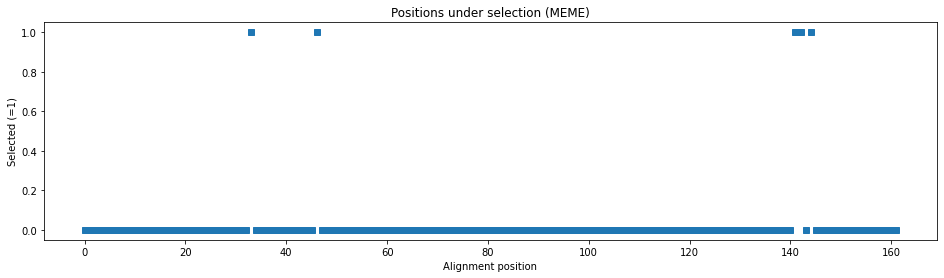

In [ ]:
# ==== PLOT 1 — Selected sites along alignment ====
plt.figure(figsize=(16,4))
plt.plot(mask, marker='s', linestyle="", markersize=6)
plt.title("Positions under selection (MEME)")
plt.xlabel("Alignment position")
plt.ylabel("Selected (=1)")
plt.show()


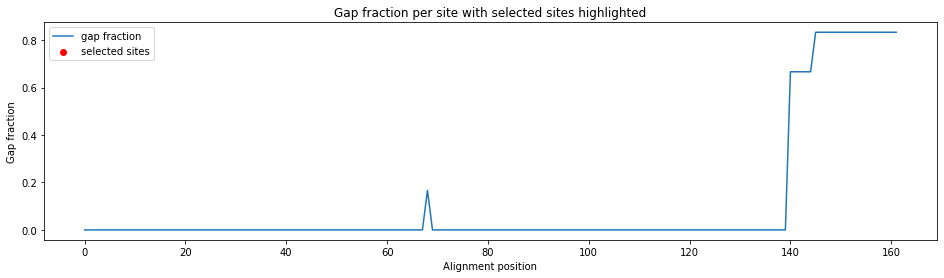

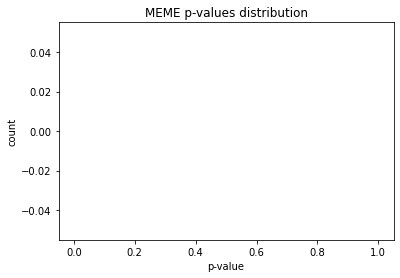

In [52]:
# ==== PLOT 2 — Gap fraction + selected sites overlay ====
plt.figure(figsize=(16,4))
plt.plot(gap_fraction, label="gap fraction")
plt.scatter(
    [i-1 for i in selected_sites],
    [gap_fraction[i-1] for i in selected_sites],
    color="red",
    label="selected sites",
    zorder=5
)
plt.title("Gap fraction per site with selected sites highlighted")
plt.xlabel("Alignment position")
plt.ylabel("Gap fraction")
plt.legend()
plt.show()

# ==== PLOT 3 — Histogram of p-values ====
plt.figure(figsize=(6,4))
plt.hist(pvalues, bins=20)
plt.title("MEME p-values distribution")
plt.xlabel("p-value")
plt.ylabel("count")
plt.show()